In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')

from MITgcmutils import rdmds, llc


sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *

# Sensitivities

In [2]:
nx = 270
nz = 50

run_dir='/nobackup/sreich/llc270_c68w_runs/run_sens_pk0000841536_ke_42days/'
adxx_uvel = rdmds(run_dir+'ctrl_variables/adxx_uvel.0000000000')
adxx_vvel = rdmds(run_dir+'ctrl_variables/adxx_vvel.0000000000')

np.unique(adxx_uvel) #nz, ny, nx

array([-0.19636671, -0.19627409, -0.19619787, ...,  0.15533948,
        0.15645975,  0.15713526])

In [3]:
def fix_uv(u_in_wrl, v_in_wrl, nx):

    # need to fix cap face?
    
    u_out = np.zeros((4*nx, 4*nx))
    u_out[:,:2*nx] = u_in_wrl[:,:2*nx]
    u_out[:,2*nx:] = v_in_wrl[:,2*nx:]
    
    v_out = np.zeros((4*nx, 4*nx))
    v_out[:,:2*nx] = v_in_wrl[:,:2*nx]
    v_out[:,2*nx:] = -u_in_wrl[:,2*nx:]

    return u_out, v_out



50
(270, 810, 50)
50
(270, 810, 50)


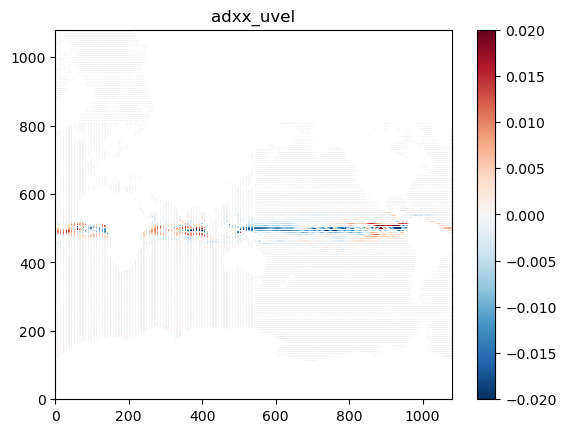

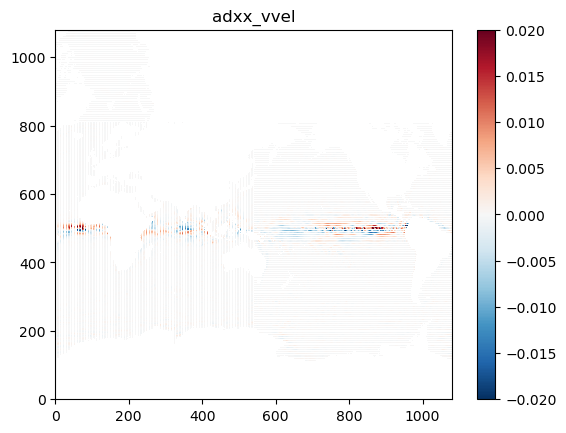

In [10]:
adxx_uvel_wrl = patchface3D(adxx_uvel, nx, nz)[0,:,:]
adxx_uvel_wrl[adxx_uvel_wrl == 0] = np.nan

adxx_vvel_wrl = patchface3D(adxx_vvel, nx, nz)[0,:,:]
adxx_vvel_wrl[adxx_vvel_wrl == 0] = np.nan

adxx_uvel_wrl, adxx_vvel_wrl = fix_uv(adxx_uvel_wrl, adxx_vvel_wrl, nx)



plt.pcolormesh(adxx_uvel_wrl, cmap='RdBu_r', vmin=-0.02, vmax=0.02)
plt.colorbar()
plt.title('adxx_uvel')
plt.show()


plt.pcolormesh(adxx_vvel_wrl, cmap='RdBu_r', vmin = -0.02, vmax = 0.02)#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('adxx_vvel')
plt.show()

50
(270, 810, 50)
50
(270, 810, 50)


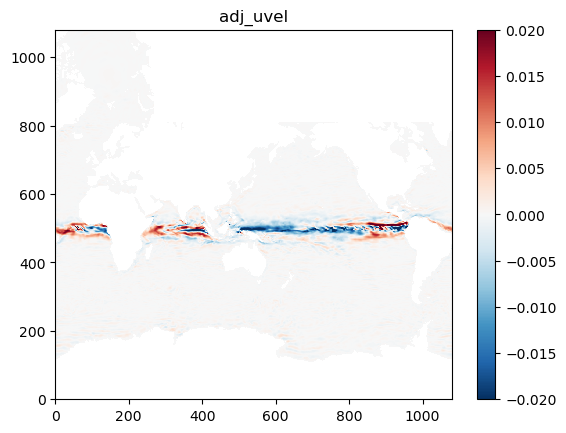

Text(0.5, 1.0, 'adj_vvel')

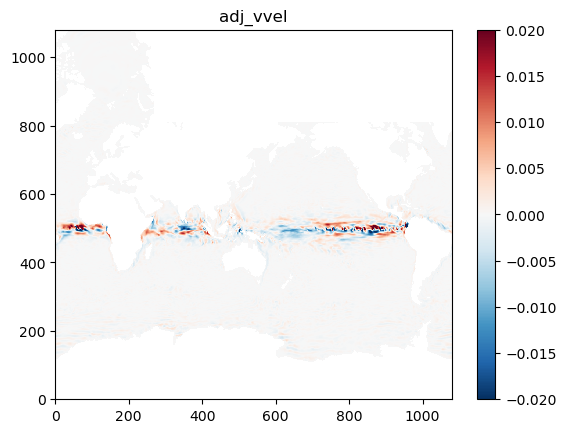

In [9]:
adj_uvel = rdmds(run_dir+'ADJuvel.0000000000')
adj_vvel = rdmds(run_dir+'ADJvvel.0000000000')


adj_uvel_wrl = patchface3D(adj_uvel, nx, nz)[0,:,:]
adj_uvel_wrl[adj_uvel_wrl == 0] = np.nan

adj_vvel_wrl = patchface3D(adj_vvel, nx, nz)[0,:,:]
adj_vvel_wrl[adj_vvel_wrl == 0] = np.nan

adj_uvel_wrl, adj_vvel_wrl = fix_uv(adj_uvel_wrl, adj_vvel_wrl, nx)

plt.pcolormesh(adj_uvel_wrl, cmap='RdBu_r', vmin=-0.02, vmax=0.02)
plt.colorbar()
plt.title('adj_uvel')
plt.show()


plt.pcolormesh(adj_vvel_wrl, cmap='RdBu_r', vmin=-0.02, vmax=0.02)
plt.colorbar()
plt.title('adj_vvel')

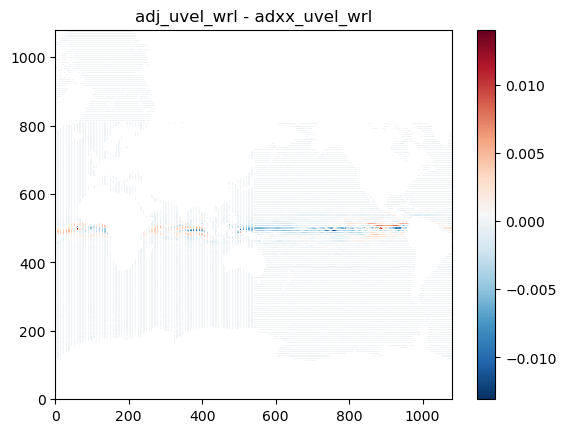

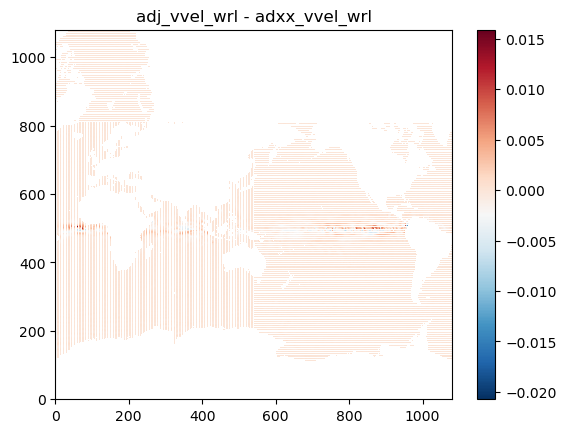

In [11]:
plt.pcolormesh(adj_uvel_wrl - adxx_uvel_wrl, cmap='RdBu_r')#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('adj_uvel_wrl - adxx_uvel_wrl')
plt.show()

plt.pcolormesh(adj_vvel_wrl - adxx_vvel_wrl, cmap='RdBu_r')#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('adj_vvel_wrl - adxx_vvel_wrl')
plt.show()

# U,V

50
(270, 810, 50)
50
(270, 810, 50)


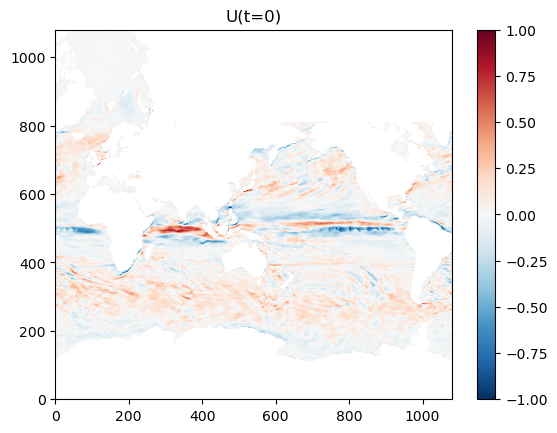

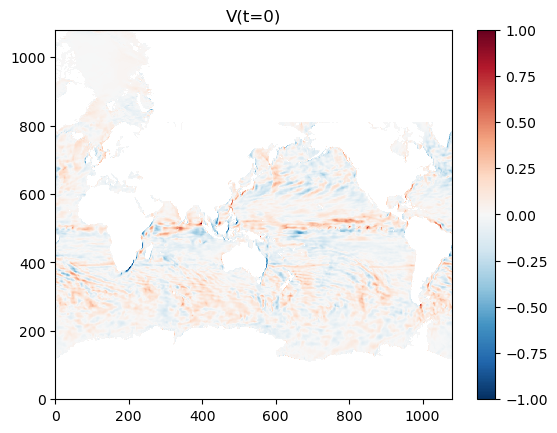

In [92]:
u0 = rdmds(run_dir+'U.0000000000')

u0 = patchface3D(u0, 270, 50)[0,:,:]
u0[u0 == 0] = np.nan


v0 = rdmds(run_dir+'V.0000000000')

v0 = patchface3D(v0, 270, 50)[0,:,:]
v0[v0 == 0] = np.nan

u0, v0 = fix_uv(u0, v0,270)



plt.pcolormesh(u0, cmap='RdBu_r',vmin=-1, vmax=1)
plt.colorbar()
plt.title('U(t=0)')
plt.show()

plt.pcolormesh(v0, cmap='RdBu_r',vmin=-1,vmax=1)
plt.colorbar()
plt.title('V(t=0)')
plt.show()


In [40]:
# adxxu_out, adxxv_out = fix_uv(adxx_uvel_wrl, adxx_vvel_wrl, 270)

# plt.pcolor(adxxu_out, cmap='RdBu_r', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title('u_out')
# plt.show()

# plt.pcolor(adxxv_out, cmap='RdBu_r', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title('v_out')
# plt.show()

## Compare to U, V ICs

In [82]:
def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data



(47385000,)
(47385000,)
50
(270, 810, 50)
50
(270, 810, 50)


Text(0.5, 1.0, 'u')

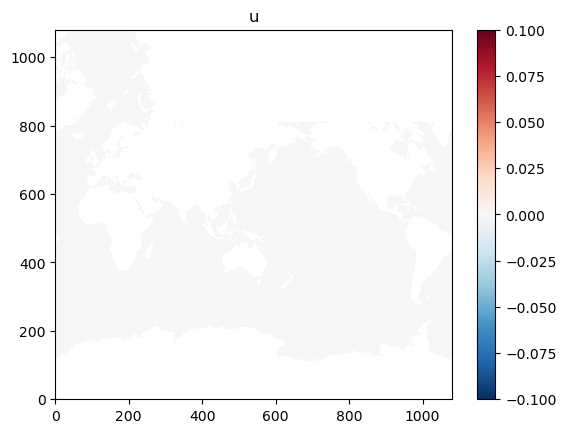

In [88]:
u = read_float32(run_dir + 'U.data')
u = u.reshape(50, 270*13, 270)

v = read_float32(run_dir + 'V.data')
v = u.reshape(50, 270*13, 270)

u_wrl = patchface3D(u, 270, 50)[0,:,:]
u_wrl[u_wrl == 0] = np.nan

v_wrl = patchface3D(v, 270, 50)[0,:,:]
v_wrl[v_wrl == 0] = np.nan

u_wrl, v_wrl = fix_uv(u_wrl, v_wrl, 270)

plt.pcolormesh(u_out-u0, cmap='RdBu_r')#, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title('u')

## Patchface3D for u, v

(47385000,)
(47385000,)
50
(270, 810, 50)
50
(270, 810, 50)


Text(0.5, 1.0, 'v_out')

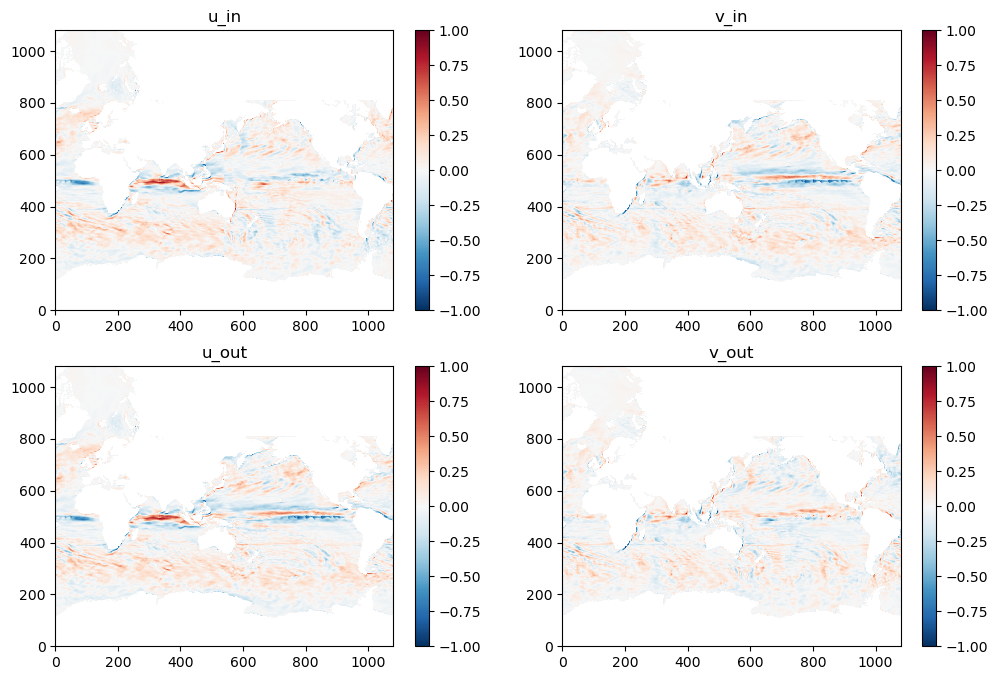

In [59]:
# read in ICs

u_in = read_float32(run_dir + 'U.data')
u_in = u_in.reshape(50, 270*13, 270)


v_in = read_float32(run_dir + 'V.data')
v_in = v_in.reshape(50, 270*13, 270)


# fix orientation

nx = 270

u_out = np.zeros((4*nx, 4*nx))
u_out[:,:2*nx] = u_in_wrl[:,:2*nx]
u_out[:,2*nx:] = v_in_wrl[:,2*nx:]

v_out = np.zeros((4*nx, 4*nx))
v_out[:,:2*nx] = v_in_wrl[:,:2*nx]
v_out[:,2*nx:] = -u_in_wrl[:,2*nx:]



fig, axes = plt.subplots(2, 2, figsize=(12, 8))

u_in_wrl = patchface3D(u_in, 270, 50)[0,:,:]
u_in_wrl[u_in_wrl == 0] = np.nan
im1 = axes[0, 0].pcolormesh(u_in_wrl, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im1, ax=axes[0, 0])
axes[0, 0].set_title('u_in')


v_in_wrl = patchface3D(v_in, 270, 50)[0,:,:]
v_in_wrl[v_in_wrl == 0] = np.nan
im2 = axes[0, 1].pcolormesh(v_in_wrl, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im2, ax=axes[0, 1])
axes[0, 1].set_title('v_in')


im3 = axes[1, 0].pcolormesh(u_out, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im3, ax=axes[1, 0])
axes[1, 0].set_title('u_out')

im4 = axes[1, 1].pcolormesh(v_out, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(im4, ax=axes[1, 1])
axes[1, 1].set_title('v_out')
